<a href="https://colab.research.google.com/github/csm-stough/C_GenericLinkedList/blob/master/Noise_Capstone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
!pip install perlin_noise
from perlin_noise import PerlinNoise
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image

import logging
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

#Base Noise Image

<function matplotlib.pyplot.show>

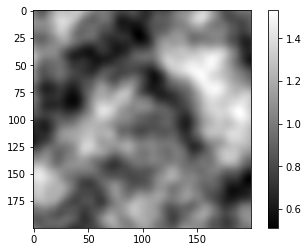

In [30]:
noise1 = PerlinNoise(octaves=3)
noise2 = PerlinNoise(octaves=6)
noise3 = PerlinNoise(octaves=12)


xpix, ypix = 200, 200
pic = []
for i in range(xpix):
    row = []
    for j in range(ypix):
        noise_val = noise1([i/xpix, j/ypix])
        noise_val += 0.5 * noise2([i/xpix, j/ypix])
        noise_val += 0.25 * noise3([i/xpix, j/ypix])
        noise_val += 1

        row.append(noise_val)
    pic.append(row)

plt.imshow(pic, cmap='gray')
plt.colorbar()
plt.show

#Creating A simple Mask

0.0


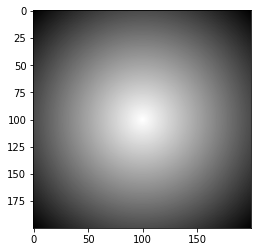

In [31]:
mask = []
center = (xpix/2, ypix/2)

for i in range(xpix):
    row = []
    for j in range(ypix):
        
        distance = math.sqrt((i - center[0])**2 + (j - center[1])**2)
        mask_val = 448 - (distance * (448 / math.sqrt(center[0]**2 + center[1]**2)))
        mask_val *= 1/448
        #mask_val -= 1

        row.append(mask_val)
    mask.append(row)

plt.imshow(mask, cmap='gray')
print(mask[0][0])
plt.show()

#Apply Modifications

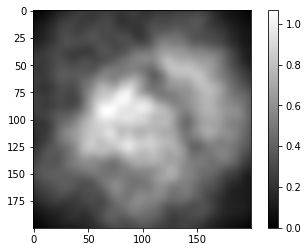

In [32]:
mod_pic = np.array(pic) * np.array(mask)

plt.imshow(mod_pic, cmap='gray')
plt.colorbar()
plt.show()

In [19]:
print(f'Max Elevation {np.max(mod_pic)}')
print(f'Min Elevation {np.min(mod_pic)}')

Max Elevation 1.1382875427766788
Min Elevation 0.0


In [33]:
water = [0, 255, 0]
grass = [0, 0, 255]

water_threshold = 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


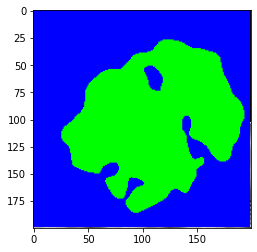

In [35]:
map = np.empty([xpix,ypix,3])

for y in range(0, ypix-1):
  for x in range(0, xpix-1):
    if 1 - mod_pic[x, y] < water_threshold:
      map[x, y] = water
    else:
      map[x, y] = grass

plt.imshow(map)

#Island Generator Function

In [173]:
#Constants################################
        #R  G   B
water = [0, 0, 255]
grass = [0, 255, 0]
sand = [255, 255, 0]
mountain = [150, 150, 150]
snow = [255, 255, 255]

water_threshold = 0.50
sand_threshold = 0.53
grass_threshold = 0.90
mountain_threshold = 1.05
##########################################

def generate_land(mod_pic):

  #creating an empty map image
  map = np.empty([mod_pic.shape[0],mod_pic.shape[1],3])

  #filling in the map image colors
  for y in range(0, mod_pic.shape[1]):
    for x in range(0, mod_pic.shape[0]):
      if mod_pic[x, y] < water_threshold:
        map[x, y] = water
      elif mod_pic[x, y] < sand_threshold:
        map[x, y] = sand
      elif mod_pic[x, y] < grass_threshold:
        map[x, y] = grass
      elif mod_pic[x, y] < mountain_threshold:
        map[x, y] = mountain
      else:
        map[x, y] = snow

  return map

def generate_land_set(num, shape):
  #the returned list is landmasses
  dataset = []

  #creating the mask once###################
  mask = []
  center = (shape[0]/2, shape[1]/2)

  for i in range(shape[0]):
      row = []
      for j in range(shape[1]):
          
          distance = math.sqrt((i - center[0])**2 + (j - center[1])**2)
          mask_val = 448 - (distance * (448 / math.sqrt(center[0]**2 + center[1]**2)))
          mask_val *= 1/448
          #mask_val -= 1

          row.append(mask_val)
      mask.append(row)
  ##########################################

  #defining the noise octaves###############
  noise1 = PerlinNoise(octaves=6)
  noise2 = PerlinNoise(octaves=12)
  noise3 = PerlinNoise(octaves=24)

  #filling in the data
  for n in range(0, num):
    #creating the initial noise image
    noise_pic = []
    for i in range(shape[0]):
        row = []
        for j in range(shape[1]):
            position = [i/shape[0] + (n * shape[0]), j/shape[1]]
            noise_val = noise1(position)
            noise_val += 0.5 * noise2(position)
            noise_val += 0.25 * noise3(position)
            noise_val += 1

            row.append(noise_val)
        noise_pic.append(row)
    ##########################################

    #applying the mask to the images
    mod_pic = np.array(noise_pic) * np.array(mask)

    dataset.append(generate_land(mod_pic))

    print(f'Done with map #{n+1}')

  return dataset

Done with map #1
Done with map #2
Done with map #3
Done with map #4
Done with map #5


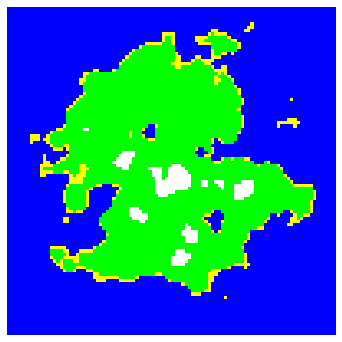

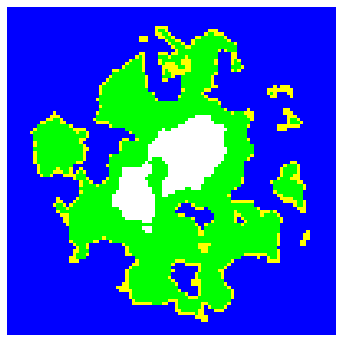

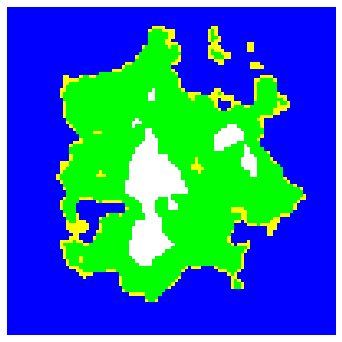

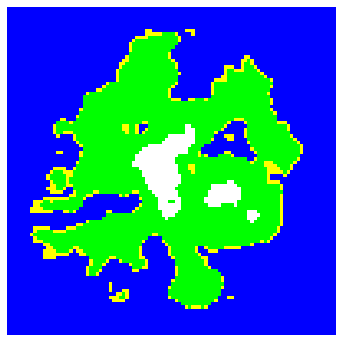

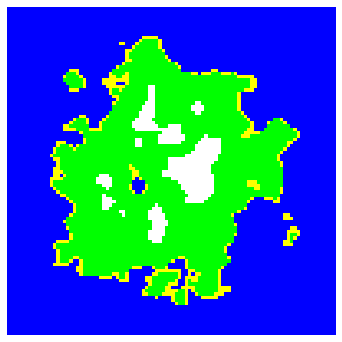

In [182]:
size = 5

islands = generate_land_set(size, [100, 100])

for x in range(0, len(islands)):
  plt.figure(figsize=(7, size * 7))
  plt.subplot(size, 1, x+1)
  plt.axis('off')
  plt.imshow(islands[x])